In [2]:
from IPython.display import clear_output #disale logs when installing packages inside cells
clear_output()

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from mlxtend.plotting import plot_decision_regions

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify
from plotly.subplots import make_subplots
from pandas import set_option
import time

import warnings
warnings.filterwarnings('ignore')  #disable jupyter warnwarnings not errors


C:\Users\Mehdi\anaconda3\envs\ai\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
import jupyterthemes as jt


In [3]:
ds=pd.read_csv(r'C:\Users\Mehdi\Desktop\MEHDI\Projects\Ai\Binary_Classification\Dibetic\diabetes.csv')

In [4]:
ds.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1

In [5]:
RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'
TARGET='Outcome'
FEATURES=[col for col in ds.columns if col != TARGET]
FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
ds.shape


(768, 9)

In [7]:
ds.describe()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          19.36          15.95   115.24   7.88   
min           0.00     0.00           0.00           0.00     0.00   0.00   
25%           1.00    99.00          62.00           0.00     0.00  27.30   
50%           3.00   117.00          72.00          23.00    30.50  32.00   
75%           6.00   140.25          80.00          32.00   127.25  36.60   
max          17.00   199.00         122.00          99.00   846.00  67.10   

       DiabetesPedigreeFunction    Age  Outcome  
count                    768.00 768.00   768.00  
mean                       0.47  33.24     0.35  
std                        0.33  11.76     0.48  
min                        0.08  21.00     0.00  
25%                        0.24  24.00     0.00  
50%                        0.37  29.00     0.00  
75%                        0.63  41.00     1.00  
max                        2.42  81.00     1.00

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

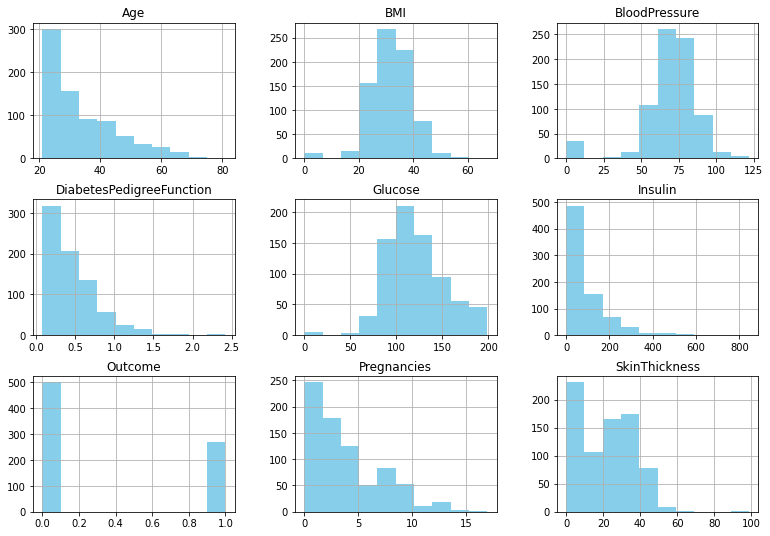

In [8]:
ds.hist(figsize=(13,9),xlabelsize=10,ylabelsize=10,color = "skyblue")

In [9]:
ds.skew()

Pregnancies                 0.90
Glucose                     0.17
BloodPressure              -1.84
SkinThickness               0.11
Insulin                     2.27
BMI                        -0.43
DiabetesPedigreeFunction    1.92
Age                         1.13
Outcome                     0.64
dtype: float64

In [10]:
ds.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
ds.groupby('Outcome').size()


Outcome
0    500
1    268
dtype: int64

In [12]:
ds.corr(method='spearman')


Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.19          -0.09   
Glucose                          0.13     1.00           0.24           0.06   
BloodPressure                    0.19     0.24           1.00           0.13   
SkinThickness                   -0.09     0.06           0.13           1.00   
Insulin                         -0.13     0.21          -0.01           0.54   
BMI                              0.00     0.23           0.29           0.44   
DiabetesPedigreeFunction        -0.04     0.09           0.03           0.18   
Age                              0.61     0.29           0.35          -0.07   
Outcome                          0.20     0.48           0.14           0.09   

                          Insulin  BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.13 0.00                     -0.04  0.61   
Glucose                      0.21 0.23                      0.09  0.29   
BloodPressure               -0.01 0.29                      0.03  0.35   
SkinThickness                0.54 0.44                      0.18 -0.07   
Insulin                      1.00 0.19                      0.22 -0.11   
BMI                          0.19 1.00                      0.14  0.13   
DiabetesPedigreeFunction     0.22 0.14                      1.00  0.04   
Age                         -0.11 0.13                      0.04  1.00   
Outcome                      0.07 0.31                      0.18  0.31   

                          Outcome  
Pregnancies                  0.20  
Glucose                      0.48  
BloodPressure                0.14  
SkinThickness                0.09  
Insulin                      0.07  
BMI                          0.31  
DiabetesPedigreeFunction     0.18  
Age                          0.31  
Outcome                      1.00

In [13]:
fig = px.imshow(ds.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

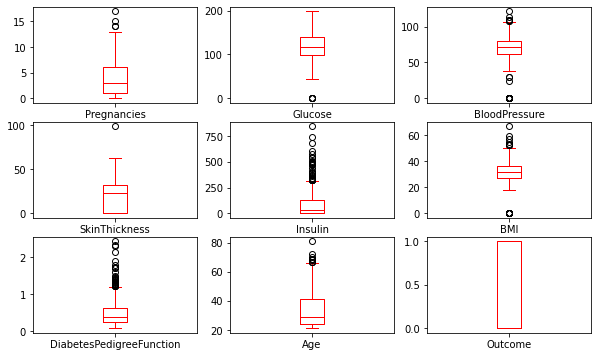

In [14]:
ds.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(10,6),color='red')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

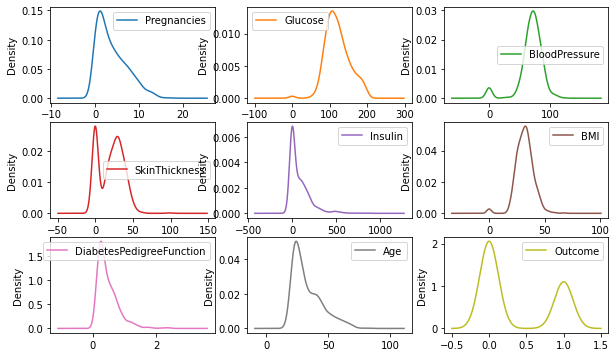

In [15]:
ds.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(10,6))

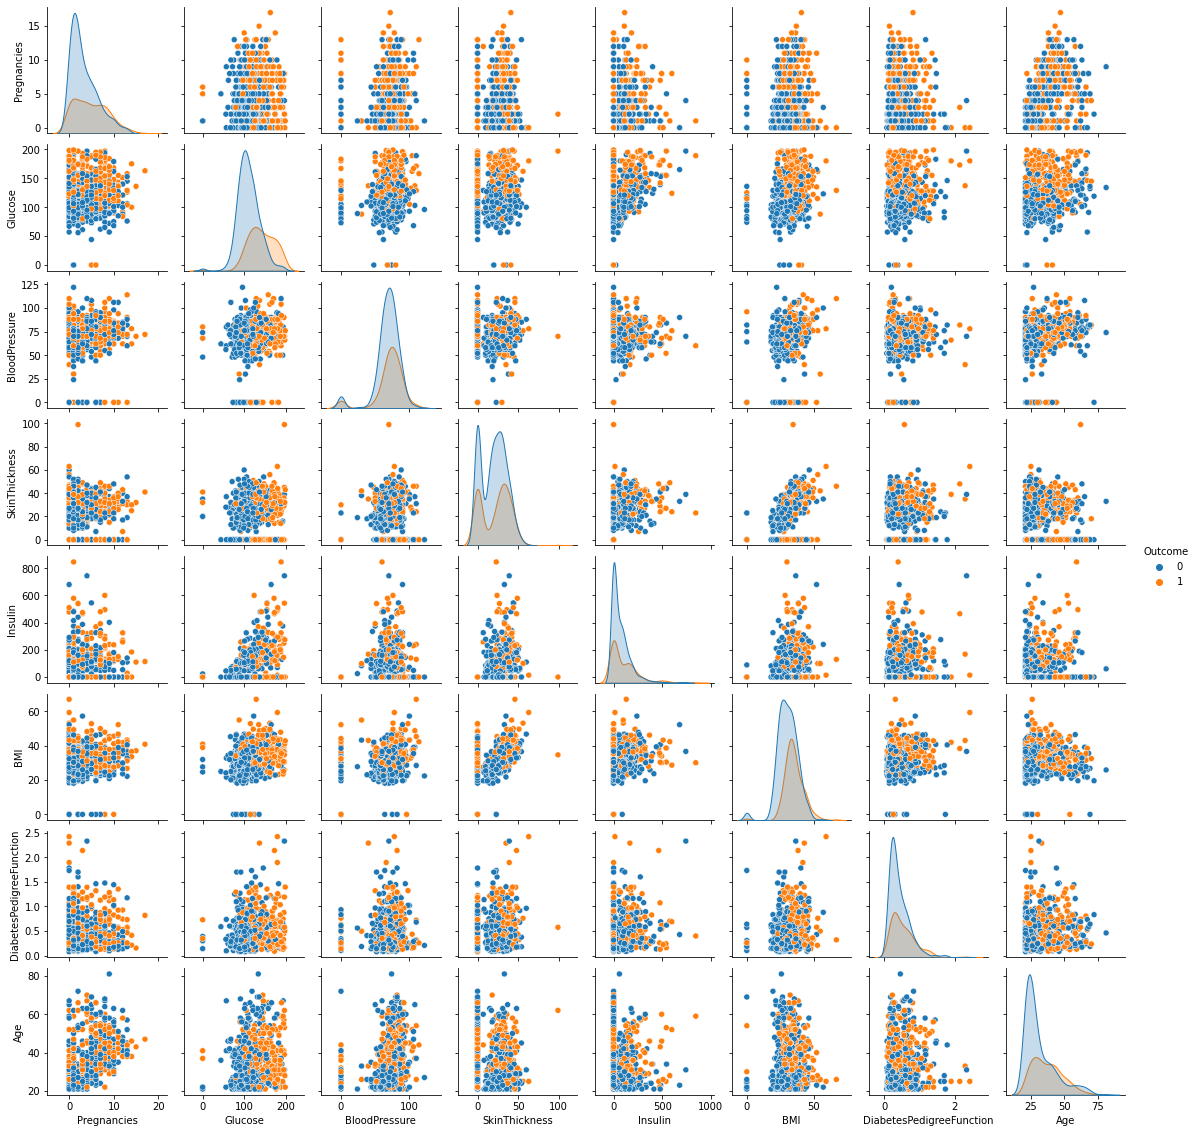

In [16]:
sns.pairplot(ds,hue='Outcome',size=2)


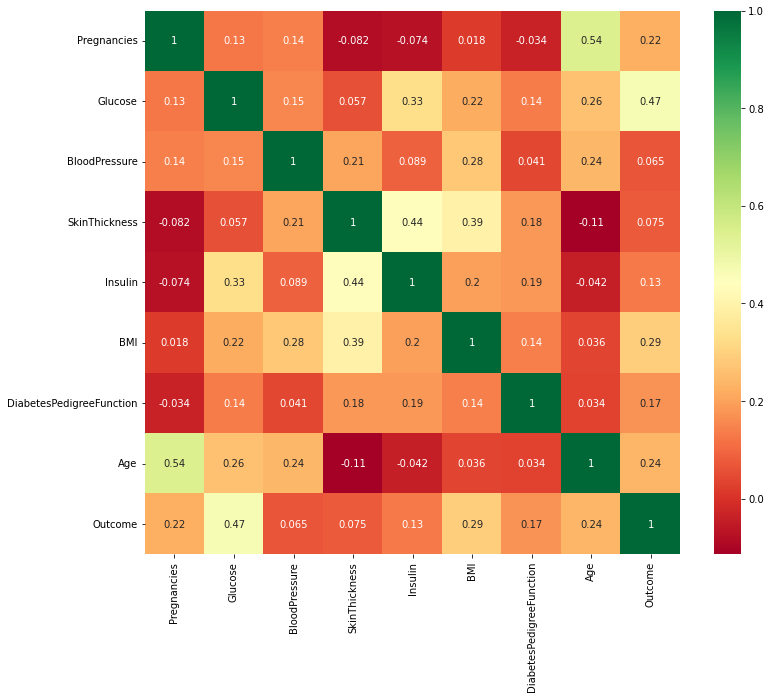

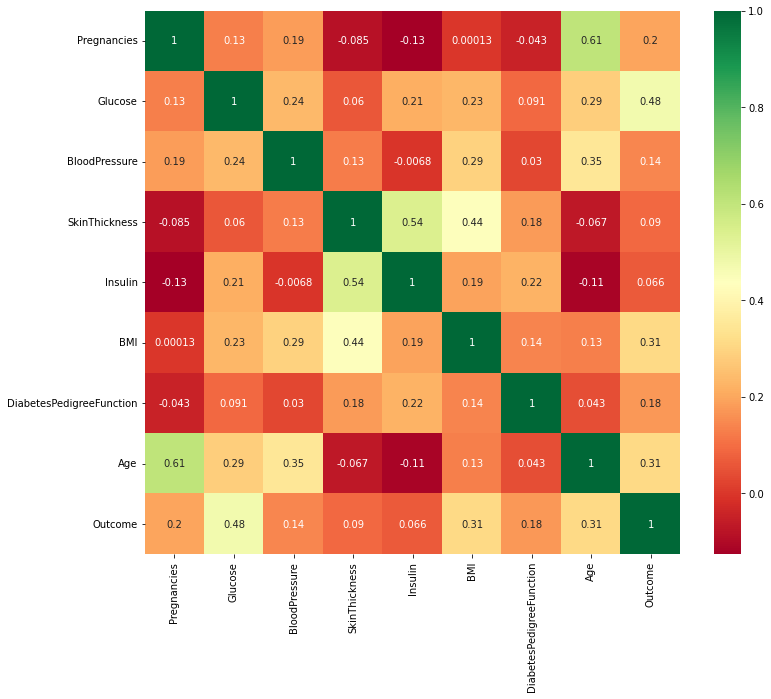

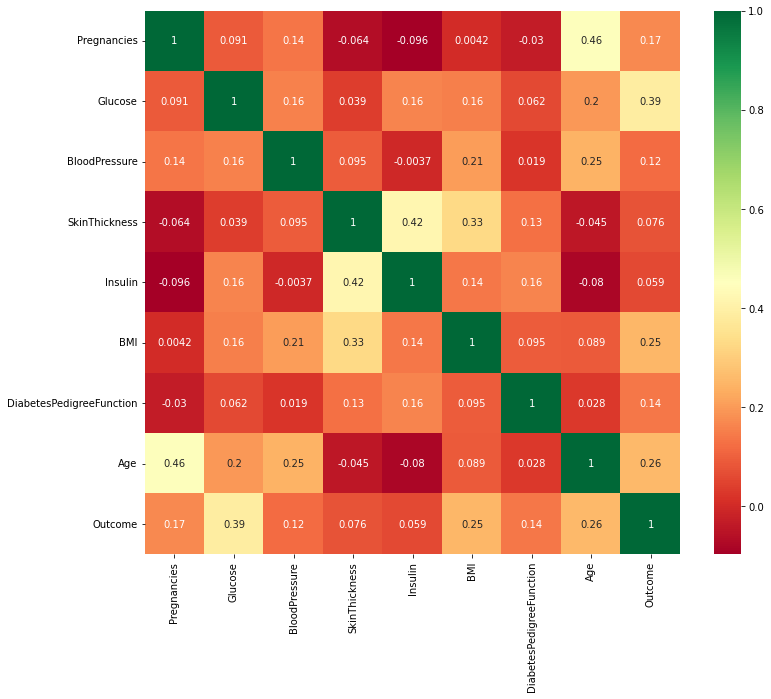

In [17]:
plt.figure(num=1,figsize=(12,10))
sns.heatmap(ds.corr(method='pearson'),annot=True,cmap ='RdYlGn');
plt.figure(num=2,figsize=(12,10))
sns.heatmap(ds.corr(method='spearman'),annot=True,cmap ='RdYlGn');
plt.figure(num=3,figsize=(12,10))
sns.heatmap(ds.corr(method='kendall'),annot=True,cmap ='RdYlGn');

In [18]:
ds_copy = ds.copy(deep = True)
ds_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = ds_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(ds_copy.isnull().sum()/(ds.shape[0])*100)
print(ds_copy.isnull().sum())

Pregnancies                 0.00
Glucose                     0.65
BloodPressure               4.56
SkinThickness              29.56
Insulin                    48.70
BMI                         1.43
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [19]:
def null_mean_imputaion(feature):   
    temp = ds_copy[ds_copy[feature].notnull()]
    temp = temp[[feature,TARGET]].groupby([TARGET])[[feature]].mean().reset_index()
    return temp[feature] 


In [20]:
for i in ds_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].columns:
    ds_copy.loc[(ds_copy[TARGET] == 0 ) & (ds_copy[i].isnull()), i] =null_mean_imputaion(feature=i)[0] 
    ds_copy.loc[(ds_copy[TARGET] == 1 ) & (ds_copy[i].isnull()), i] =null_mean_imputaion(feature=i)[1]


In [21]:
print(ds_copy.isnull().sum()/(ds.shape[0])*100)

Pregnancies                0.00
Glucose                    0.00
BloodPressure              0.00
SkinThickness              0.00
Insulin                    0.00
BMI                        0.00
DiabetesPedigreeFunction   0.00
Age                        0.00
Outcome                    0.00
dtype: float64


In [22]:
def plot_feat1_feat2(feat1, feat2) :  
    D = ds_copy[(ds_copy[TARGET] != 0)]
    H = ds_copy[(ds_copy[TARGET] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = '1',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = '0',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [ ]:
FEATURES=[col for col in ds_copy.columns if col != TARGET]
for i in FEATURES:
    for j in range(len(FEATURES)):
        plot_feat1_feat2(i,FEATURES[j])

In [26]:
ds_copy.loc[:,'N0']=1
ds_copy.loc[(ds_copy['Pregnancies']<=4) & (ds_copy['Glucose']<=100) ,'N0']=0
ds_copy.loc[:,'N1']=1
ds_copy.loc[(ds_copy['Pregnancies']<=5) & (ds_copy['BloodPressure']<=80) ,'N1']=0
ds_copy.loc[:,'N2']=1
ds_copy.loc[(ds_copy['Pregnancies']<=5) & (ds_copy['SkinThickness']<=30) ,'N2']=0
ds_copy.loc[:,'N3']=1
ds_copy.loc[(ds_copy['Pregnancies']<=6) & (ds_copy['Insulin']<=150) ,'N3']=0
ds_copy.loc[:,'N4']=1
ds_copy.loc[(ds_copy['Pregnancies']<=6) & (ds_copy['BMI']<=30) ,'N4']=0
ds_copy.loc[:,'N5']=1
ds_copy.loc[(ds_copy['Pregnancies']<=6) & (ds_copy['Age']<=28) ,'N5']=0

ds_copy.loc[:,'N6']=1
ds_copy.loc[(ds_copy['Glucose']<=105) & (ds_copy['BloodPressure']<=75) ,'N6']=0
ds_copy.loc[:,'N7']=1
ds_copy.loc[(ds_copy['Glucose']<=99) & (ds_copy['Insulin']<=160) ,'N7']=0
ds_copy.loc[:,'N8']=1
ds_copy.loc[(ds_copy['Glucose']<=143) & (ds_copy['BMI']<=26.2) ,'N8']=0
ds_copy.loc[:,'N9']=1
ds_copy.loc[(ds_copy['Glucose']<=111) & (ds_copy['Age']<=30) ,'N9']=0

ds_copy.loc[:,'N10']=1
ds_copy.loc[(ds_copy['BloodPressure']<=92) & (ds_copy['Age']<=28) ,'N10']=0
ds_copy.loc[:,'N11']=1
ds_copy.loc[(ds_copy['SkinThickness']<=30) & (ds_copy['Glucose']<=110) ,'N11']=0

ds_copy.loc[:,'N12']=1
ds_copy.loc[(ds_copy['Insulin']==130.2879),'N12']=0
ds_copy.loc[:,'N13']=1
ds_copy.loc[(ds_copy['Insulin']<=100) & (ds_copy['BloodPressure']<=74) ,'N13']=0

ds_copy.loc[:,'N00']=1
ds_copy.loc[(ds_copy['SkinThickness']<=48) & (ds_copy['N6']==1) ,'N00']=0
ds_copy.loc[:,'N11']=1
ds_copy.loc[(ds_copy['BloodPressure']<=100) & (ds_copy['N6']==1) ,'N11']=0
ds_copy.loc[:,'N22']=1
ds_copy.loc[(ds_copy['Pregnancies']<=13) & (ds_copy['N7']==1) ,'N22']=0
ds_copy.loc[:,'N33']=1
ds_copy.loc[(ds_copy['Glucose']<=97) & (ds_copy['N7']==1) ,'N33']=0
ds_copy.loc[:,'N66']=1
ds_copy.loc[(ds_copy['Insulin']<=342) & (ds_copy['N7']==1) ,'N66']=0
ds_copy.loc[:,'N44']=1
ds_copy.loc[(ds_copy['Pregnancies']<=13) & (ds_copy['N8']==1) ,'N44']=0
ds_copy.loc[:,'N55']=1
ds_copy.loc[(ds_copy['Glucose']<=155) & (ds_copy['N8']==1) ,'N55']=0

In [28]:
ds_copy['N77'] = ds_copy['BMI'] * ds_copy['SkinThickness']

ds_copy['N88'] =  ds_copy['Pregnancies'] / ds_copy['Age']

ds_copy['N99'] = ds_copy['Glucose'] / ds_copy['DiabetesPedigreeFunction']

ds_copy['N100'] = ds_copy['Age'] * ds_copy['DiabetesPedigreeFunction']

ds_copy['N101'] = ds_copy['Age'] / ds_copy['Insulin']


In [32]:
FEATURES=[col for col in ds_copy.columns if col != TARGET]
ss = StandardScaler()
sc_x=ss.fit_transform(ds_copy.drop(["Outcome"],axis = 1),)
x=pd.DataFrame(sc_x,columns=FEATURES)
y=ds_copy[TARGET]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=RANDOM_STATE)

In [36]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier( n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
print(sum(train_scores)/len(train_scores))    
print(sum(test_scores)/len(test_scores))    

0.8670094496942747
0.842800899887514


In [29]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [37]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 86.61417322834646 % and k = [7]


In [38]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(x_train , x_test , y_train , y_test)
clear_output()
models[:]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.89               0.89     0.89      0.89   
RandomForestClassifier             0.89               0.87     0.87      0.89   
AdaBoostClassifier                 0.88               0.87     0.87      0.88   
XGBClassifier                      0.87               0.87     0.87      0.87   
SVC                                0.87               0.86     0.86      0.87   
ExtraTreesClassifier               0.87               0.86     0.86      0.87   
CalibratedClassifierCV             0.86               0.85     0.85      0.86   
LogisticRegression                 0.86               0.85     0.85      0.86   
NuSVC                              0.86               0.85     0.85      0.86   
RidgeClassifierCV                  0.86               0.85     0.85      0.86   
BernoulliNB                        0.83               0.85     0.85      0.84   
LinearDiscriminantAnalysis         0.85               0.85     0.85      0.85   
Perceptron                         0.84               0.85     0.85      0.84   
LinearSVC                          0.85               0.84     0.84      0.85   
BaggingClassifier                  0.87               0.84     0.84      0.86   
KNeighborsClassifier               0.85               0.84     0.84      0.85   
RidgeClassifier                    0.85               0.84     0.84      0.85   
NearestCentroid                    0.81               0.84     0.84      0.81   
PassiveAggressiveClassifier        0.83               0.83     0.83      0.83   
GaussianNB                         0.78               0.81     0.81      0.78   
LabelSpreading                     0.80               0.78     0.78      0.79   
DecisionTreeClassifier             0.80               0.77     0.77      0.80   
LabelPropagation                   0.79               0.77     0.77      0.79   
ExtraTreeClassifier                0.79               0.77     0.77      0.79   
SGDClassifier                      0.76               0.71     0.71      0.75   
QuadraticDiscriminantAnalysis      0.68               0.66     0.66      0.68   
DummyClassifier                    0.54               0.49     0.49      0.53   

                               Time Taken  
Model                                      
LGBMClassifier                       0.10  
RandomForestClassifier               0.25  
AdaBoostClassifier                   0.17  
XGBClassifier                        0.10  
SVC                                  0.02  
ExtraTreesClassifier                 0.14  
CalibratedClassifierCV               0.16  
LogisticRegression                   0.08  
NuSVC                                0.04  
RidgeClassifierCV                    0.05  
BernoulliNB                          0.02  
LinearDiscriminantAnalysis           0.05  
Perceptron                           0.02  
LinearSVC                            0.06  
BaggingClassifier                    0.07  
KNeighborsClassifier                 0.03  
RidgeClassifier                      0.03  
NearestCentroid                      0.02  
PassiveAggressiveClassifier          0.05  
GaussianNB                           0.02  
LabelSpreading                       0.09  
DecisionTreeClassifier               0.02  
LabelPropagation                     0.06  
ExtraTreeClassifier                  0.02  
SGDClassifier                        0.05  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.02

In [45]:
knn = KNeighborsClassifier(7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8661417322834646

In [46]:

lsvc=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)

Score:  0.8501945525291829


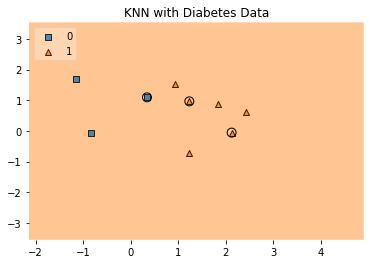

In [33]:
## trying to plot decision boundary 
value = 20000
width = 20000
plot_decision_regions(x.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=x_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [47]:
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          142  17  159
1           17  78   95
All        159  95  254

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       159
           1       0.82      0.82      0.82        95

    accuracy                           0.87       254
   macro avg       0.86      0.86      0.86       254
weighted avg       0.87      0.87      0.87       254



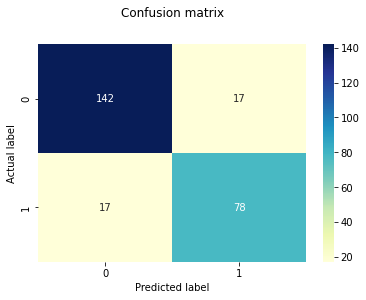

In [48]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(classification_report(y_test,y_pred))

In [49]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('GaussianNB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier()))
models.append(('XGBClassifier',XGBClassifier()))
models.append(('LGBMClassifier',LGBMClassifier()))
models.append(('CatBoostClassifier',CatBoostClassifier()))
models.append(('make_classification',make_classification()))

results=[]
for name,model in models:
              kfold=StratifiedKFold(n_splits=10,random_state=7,shuffle=True)
              cv_results=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
              results.append(cv_results)
              print(f'{name}:\n{cv_results.mean()} {cv_results.std()}')


LogisticRegression:
0.8372522214627478 0.03586792867841206
LinearDiscriminantAnalysis:
0.8398838004101161 0.037948062265346263
KNeighborsClassifier:
0.8372863978127135 0.037221308826794954
DecisionTreeClassifier:
0.8384825700615174 0.0361977242045344
GaussianNB:
0.7487012987012986 0.0475319313431072
SVC:
0.8516233766233766 0.03841352181791744
AdaBoostClassifier:
0.871103896103896 0.024425936784213717
GradientBoostingClassifier:
0.8892857142857142 0.03378470487092719
RandomForestClassifier:
0.8684552289815448 0.03928599301746225
ExtraTreesClassifier:
0.8645078605604922 0.03623309266135519
XGBClassifier:
0.8788448393711551 0.028798011345105193
LGBMClassifier:
0.8906015037593985 0.029381505661058658
Learning rate set to 0.008798
0:	learn: 0.6854877	total: 163ms	remaining: 2m 42s
1:	learn: 0.6794796	total: 165ms	remaining: 1m 22s
2:	learn: 0.6720635	total: 170ms	remaining: 56.5s
3:	learn: 0.6641072	total: 176ms	remaining: 43.8s
4:	learn: 0.6566361	total: 182ms	remaining: 36.1s
5:	learn: 0.

180:	learn: 0.2599555	total: 689ms	remaining: 3.12s
181:	learn: 0.2593846	total: 692ms	remaining: 3.11s
182:	learn: 0.2588473	total: 694ms	remaining: 3.1s
183:	learn: 0.2581634	total: 697ms	remaining: 3.09s
184:	learn: 0.2574540	total: 699ms	remaining: 3.08s
185:	learn: 0.2568317	total: 701ms	remaining: 3.07s
186:	learn: 0.2562819	total: 704ms	remaining: 3.06s
187:	learn: 0.2555539	total: 706ms	remaining: 3.05s
188:	learn: 0.2548225	total: 709ms	remaining: 3.04s
189:	learn: 0.2541147	total: 712ms	remaining: 3.03s
190:	learn: 0.2534168	total: 715ms	remaining: 3.03s
191:	learn: 0.2530225	total: 718ms	remaining: 3.02s
192:	learn: 0.2524978	total: 720ms	remaining: 3.01s
193:	learn: 0.2516489	total: 723ms	remaining: 3s
194:	learn: 0.2511007	total: 725ms	remaining: 2.99s
195:	learn: 0.2506576	total: 728ms	remaining: 2.98s
196:	learn: 0.2501868	total: 730ms	remaining: 2.98s
197:	learn: 0.2495605	total: 732ms	remaining: 2.96s
198:	learn: 0.2491005	total: 735ms	remaining: 2.96s
199:	learn: 0.24

401:	learn: 0.1766110	total: 1.2s	remaining: 1.79s
402:	learn: 0.1763671	total: 1.2s	remaining: 1.78s
403:	learn: 0.1760525	total: 1.21s	remaining: 1.78s
404:	learn: 0.1758401	total: 1.21s	remaining: 1.77s
405:	learn: 0.1755442	total: 1.21s	remaining: 1.77s
406:	learn: 0.1753482	total: 1.21s	remaining: 1.77s
407:	learn: 0.1750626	total: 1.22s	remaining: 1.76s
408:	learn: 0.1749856	total: 1.22s	remaining: 1.76s
409:	learn: 0.1748477	total: 1.22s	remaining: 1.76s
410:	learn: 0.1745656	total: 1.22s	remaining: 1.75s
411:	learn: 0.1743832	total: 1.23s	remaining: 1.75s
412:	learn: 0.1740708	total: 1.23s	remaining: 1.75s
413:	learn: 0.1738874	total: 1.23s	remaining: 1.74s
414:	learn: 0.1737818	total: 1.23s	remaining: 1.74s
415:	learn: 0.1735934	total: 1.23s	remaining: 1.73s
416:	learn: 0.1735122	total: 1.24s	remaining: 1.73s
417:	learn: 0.1733137	total: 1.24s	remaining: 1.72s
418:	learn: 0.1731964	total: 1.24s	remaining: 1.72s
419:	learn: 0.1729116	total: 1.24s	remaining: 1.72s
420:	learn: 0.

638:	learn: 0.1302145	total: 1.74s	remaining: 984ms
639:	learn: 0.1299668	total: 1.74s	remaining: 981ms
640:	learn: 0.1298412	total: 1.75s	remaining: 979ms
641:	learn: 0.1297485	total: 1.75s	remaining: 976ms
642:	learn: 0.1295450	total: 1.75s	remaining: 973ms
643:	learn: 0.1292514	total: 1.75s	remaining: 970ms
644:	learn: 0.1289766	total: 1.76s	remaining: 967ms
645:	learn: 0.1287932	total: 1.76s	remaining: 964ms
646:	learn: 0.1286272	total: 1.76s	remaining: 961ms
647:	learn: 0.1284465	total: 1.76s	remaining: 959ms
648:	learn: 0.1283267	total: 1.77s	remaining: 956ms
649:	learn: 0.1282231	total: 1.77s	remaining: 953ms
650:	learn: 0.1280758	total: 1.77s	remaining: 950ms
651:	learn: 0.1279075	total: 1.77s	remaining: 947ms
652:	learn: 0.1276928	total: 1.78s	remaining: 944ms
653:	learn: 0.1275881	total: 1.78s	remaining: 941ms
654:	learn: 0.1273021	total: 1.78s	remaining: 938ms
655:	learn: 0.1271565	total: 1.78s	remaining: 935ms
656:	learn: 0.1268223	total: 1.78s	remaining: 932ms
657:	learn: 

864:	learn: 0.0966200	total: 2.28s	remaining: 355ms
865:	learn: 0.0965723	total: 2.28s	remaining: 353ms
866:	learn: 0.0964318	total: 2.28s	remaining: 350ms
867:	learn: 0.0963423	total: 2.28s	remaining: 347ms
868:	learn: 0.0962621	total: 2.29s	remaining: 345ms
869:	learn: 0.0960557	total: 2.29s	remaining: 342ms
870:	learn: 0.0959687	total: 2.29s	remaining: 339ms
871:	learn: 0.0959382	total: 2.29s	remaining: 337ms
872:	learn: 0.0958849	total: 2.3s	remaining: 334ms
873:	learn: 0.0957407	total: 2.3s	remaining: 332ms
874:	learn: 0.0955994	total: 2.3s	remaining: 329ms
875:	learn: 0.0954285	total: 2.31s	remaining: 326ms
876:	learn: 0.0952319	total: 2.32s	remaining: 325ms
877:	learn: 0.0951099	total: 2.33s	remaining: 323ms
878:	learn: 0.0949671	total: 2.33s	remaining: 321ms
879:	learn: 0.0947442	total: 2.33s	remaining: 319ms
880:	learn: 0.0946544	total: 2.34s	remaining: 316ms
881:	learn: 0.0946073	total: 2.35s	remaining: 314ms
882:	learn: 0.0945299	total: 2.35s	remaining: 312ms
883:	learn: 0.0

49:	learn: 0.4447633	total: 234ms	remaining: 4.44s
50:	learn: 0.4423201	total: 237ms	remaining: 4.42s
51:	learn: 0.4395861	total: 242ms	remaining: 4.42s
52:	learn: 0.4371202	total: 247ms	remaining: 4.41s
53:	learn: 0.4344899	total: 251ms	remaining: 4.4s
54:	learn: 0.4321793	total: 255ms	remaining: 4.38s
55:	learn: 0.4292965	total: 258ms	remaining: 4.34s
56:	learn: 0.4266574	total: 260ms	remaining: 4.3s
57:	learn: 0.4231689	total: 263ms	remaining: 4.26s
58:	learn: 0.4207545	total: 265ms	remaining: 4.23s
59:	learn: 0.4179949	total: 267ms	remaining: 4.19s
60:	learn: 0.4153708	total: 269ms	remaining: 4.15s
61:	learn: 0.4125569	total: 271ms	remaining: 4.11s
62:	learn: 0.4100098	total: 274ms	remaining: 4.07s
63:	learn: 0.4068339	total: 277ms	remaining: 4.05s
64:	learn: 0.4047955	total: 281ms	remaining: 4.04s
65:	learn: 0.4027539	total: 284ms	remaining: 4.02s
66:	learn: 0.4002881	total: 287ms	remaining: 4s
67:	learn: 0.3976781	total: 291ms	remaining: 3.98s
68:	learn: 0.3947462	total: 294ms	re

238:	learn: 0.2312113	total: 765ms	remaining: 2.44s
239:	learn: 0.2307961	total: 767ms	remaining: 2.43s
240:	learn: 0.2304190	total: 770ms	remaining: 2.42s
241:	learn: 0.2299535	total: 773ms	remaining: 2.42s
242:	learn: 0.2290200	total: 776ms	remaining: 2.42s
243:	learn: 0.2283852	total: 778ms	remaining: 2.41s
244:	learn: 0.2280472	total: 781ms	remaining: 2.41s
245:	learn: 0.2274383	total: 784ms	remaining: 2.4s
246:	learn: 0.2270700	total: 787ms	remaining: 2.4s
247:	learn: 0.2266067	total: 789ms	remaining: 2.39s
248:	learn: 0.2261653	total: 791ms	remaining: 2.39s
249:	learn: 0.2258558	total: 793ms	remaining: 2.38s
250:	learn: 0.2255878	total: 796ms	remaining: 2.37s
251:	learn: 0.2252411	total: 798ms	remaining: 2.37s
252:	learn: 0.2249577	total: 800ms	remaining: 2.36s
253:	learn: 0.2245918	total: 802ms	remaining: 2.36s
254:	learn: 0.2243930	total: 805ms	remaining: 2.35s
255:	learn: 0.2240807	total: 807ms	remaining: 2.35s
256:	learn: 0.2235948	total: 809ms	remaining: 2.34s
257:	learn: 0.

467:	learn: 0.1630899	total: 1.3s	remaining: 1.47s
468:	learn: 0.1628139	total: 1.3s	remaining: 1.47s
469:	learn: 0.1626702	total: 1.3s	remaining: 1.47s
470:	learn: 0.1624315	total: 1.3s	remaining: 1.47s
471:	learn: 0.1621980	total: 1.31s	remaining: 1.46s
472:	learn: 0.1619175	total: 1.31s	remaining: 1.46s
473:	learn: 0.1618131	total: 1.31s	remaining: 1.46s
474:	learn: 0.1615908	total: 1.31s	remaining: 1.45s
475:	learn: 0.1613862	total: 1.32s	remaining: 1.45s
476:	learn: 0.1611166	total: 1.32s	remaining: 1.45s
477:	learn: 0.1610626	total: 1.32s	remaining: 1.44s
478:	learn: 0.1608115	total: 1.32s	remaining: 1.44s
479:	learn: 0.1605447	total: 1.33s	remaining: 1.44s
480:	learn: 0.1601569	total: 1.33s	remaining: 1.43s
481:	learn: 0.1597619	total: 1.33s	remaining: 1.43s
482:	learn: 0.1595900	total: 1.33s	remaining: 1.43s
483:	learn: 0.1592862	total: 1.34s	remaining: 1.42s
484:	learn: 0.1591307	total: 1.34s	remaining: 1.42s
485:	learn: 0.1588176	total: 1.34s	remaining: 1.42s
486:	learn: 0.15

687:	learn: 0.1228843	total: 1.82s	remaining: 824ms
688:	learn: 0.1226805	total: 1.82s	remaining: 822ms
689:	learn: 0.1225629	total: 1.82s	remaining: 819ms
690:	learn: 0.1224184	total: 1.82s	remaining: 816ms
691:	learn: 0.1222427	total: 1.83s	remaining: 814ms
692:	learn: 0.1220807	total: 1.83s	remaining: 812ms
693:	learn: 0.1219014	total: 1.83s	remaining: 809ms
694:	learn: 0.1218144	total: 1.84s	remaining: 806ms
695:	learn: 0.1217946	total: 1.84s	remaining: 804ms
696:	learn: 0.1216605	total: 1.84s	remaining: 801ms
697:	learn: 0.1214569	total: 1.84s	remaining: 798ms
698:	learn: 0.1212231	total: 1.85s	remaining: 795ms
699:	learn: 0.1210832	total: 1.85s	remaining: 792ms
700:	learn: 0.1209325	total: 1.85s	remaining: 790ms
701:	learn: 0.1207712	total: 1.85s	remaining: 787ms
702:	learn: 0.1204446	total: 1.85s	remaining: 784ms
703:	learn: 0.1202859	total: 1.86s	remaining: 781ms
704:	learn: 0.1200965	total: 1.87s	remaining: 784ms
705:	learn: 0.1198596	total: 1.88s	remaining: 781ms
706:	learn: 

854:	learn: 0.0969698	total: 2.34s	remaining: 396ms
855:	learn: 0.0969312	total: 2.34s	remaining: 393ms
856:	learn: 0.0967808	total: 2.34s	remaining: 391ms
857:	learn: 0.0965516	total: 2.34s	remaining: 388ms
858:	learn: 0.0964855	total: 2.35s	remaining: 385ms
859:	learn: 0.0963138	total: 2.35s	remaining: 382ms
860:	learn: 0.0961677	total: 2.35s	remaining: 380ms
861:	learn: 0.0961073	total: 2.35s	remaining: 377ms
862:	learn: 0.0960172	total: 2.35s	remaining: 374ms
863:	learn: 0.0959408	total: 2.36s	remaining: 371ms
864:	learn: 0.0957552	total: 2.36s	remaining: 368ms
865:	learn: 0.0956475	total: 2.36s	remaining: 366ms
866:	learn: 0.0955554	total: 2.37s	remaining: 363ms
867:	learn: 0.0954246	total: 2.37s	remaining: 360ms
868:	learn: 0.0953423	total: 2.37s	remaining: 357ms
869:	learn: 0.0951136	total: 2.37s	remaining: 355ms
870:	learn: 0.0950250	total: 2.37s	remaining: 352ms
871:	learn: 0.0948900	total: 2.38s	remaining: 349ms
872:	learn: 0.0947436	total: 2.38s	remaining: 346ms
873:	learn: 

32:	learn: 0.5066584	total: 174ms	remaining: 5.08s
33:	learn: 0.5030674	total: 179ms	remaining: 5.08s
34:	learn: 0.4989843	total: 184ms	remaining: 5.07s
35:	learn: 0.4948656	total: 190ms	remaining: 5.08s
36:	learn: 0.4909106	total: 195ms	remaining: 5.08s
37:	learn: 0.4865208	total: 200ms	remaining: 5.07s
38:	learn: 0.4820616	total: 206ms	remaining: 5.07s
39:	learn: 0.4790037	total: 210ms	remaining: 5.03s
40:	learn: 0.4754970	total: 214ms	remaining: 5s
41:	learn: 0.4719257	total: 218ms	remaining: 4.97s
42:	learn: 0.4684052	total: 222ms	remaining: 4.95s
43:	learn: 0.4645555	total: 226ms	remaining: 4.92s
44:	learn: 0.4615010	total: 230ms	remaining: 4.87s
45:	learn: 0.4584677	total: 234ms	remaining: 4.84s
46:	learn: 0.4550978	total: 238ms	remaining: 4.82s
47:	learn: 0.4520951	total: 243ms	remaining: 4.82s
48:	learn: 0.4485006	total: 248ms	remaining: 4.8s
49:	learn: 0.4454548	total: 252ms	remaining: 4.79s
50:	learn: 0.4429509	total: 255ms	remaining: 4.75s
51:	learn: 0.4402383	total: 259ms	r

214:	learn: 0.2414929	total: 884ms	remaining: 3.23s
215:	learn: 0.2409174	total: 887ms	remaining: 3.22s
216:	learn: 0.2401094	total: 890ms	remaining: 3.21s
217:	learn: 0.2396693	total: 893ms	remaining: 3.2s
218:	learn: 0.2391832	total: 896ms	remaining: 3.19s
219:	learn: 0.2387893	total: 899ms	remaining: 3.19s
220:	learn: 0.2379804	total: 902ms	remaining: 3.18s
221:	learn: 0.2372538	total: 905ms	remaining: 3.17s
222:	learn: 0.2370387	total: 908ms	remaining: 3.17s
223:	learn: 0.2363435	total: 912ms	remaining: 3.16s
224:	learn: 0.2358446	total: 916ms	remaining: 3.15s
225:	learn: 0.2349064	total: 919ms	remaining: 3.15s
226:	learn: 0.2343798	total: 921ms	remaining: 3.14s
227:	learn: 0.2336279	total: 924ms	remaining: 3.13s
228:	learn: 0.2331216	total: 927ms	remaining: 3.12s
229:	learn: 0.2328304	total: 930ms	remaining: 3.11s
230:	learn: 0.2323291	total: 933ms	remaining: 3.11s
231:	learn: 0.2315485	total: 936ms	remaining: 3.1s
232:	learn: 0.2312455	total: 938ms	remaining: 3.09s
233:	learn: 0.

433:	learn: 0.1716093	total: 1.41s	remaining: 1.84s
434:	learn: 0.1713111	total: 1.41s	remaining: 1.83s
435:	learn: 0.1710858	total: 1.42s	remaining: 1.83s
436:	learn: 0.1705668	total: 1.42s	remaining: 1.83s
437:	learn: 0.1705130	total: 1.42s	remaining: 1.82s
438:	learn: 0.1702720	total: 1.42s	remaining: 1.82s
439:	learn: 0.1700534	total: 1.43s	remaining: 1.81s
440:	learn: 0.1698384	total: 1.43s	remaining: 1.81s
441:	learn: 0.1696903	total: 1.43s	remaining: 1.8s
442:	learn: 0.1695232	total: 1.43s	remaining: 1.8s
443:	learn: 0.1692466	total: 1.43s	remaining: 1.8s
444:	learn: 0.1689041	total: 1.44s	remaining: 1.79s
445:	learn: 0.1686933	total: 1.44s	remaining: 1.79s
446:	learn: 0.1684033	total: 1.44s	remaining: 1.78s
447:	learn: 0.1682585	total: 1.44s	remaining: 1.78s
448:	learn: 0.1681502	total: 1.45s	remaining: 1.77s
449:	learn: 0.1679692	total: 1.45s	remaining: 1.77s
450:	learn: 0.1675460	total: 1.45s	remaining: 1.76s
451:	learn: 0.1672739	total: 1.45s	remaining: 1.76s
452:	learn: 0.1

651:	learn: 0.1295308	total: 1.92s	remaining: 1.02s
652:	learn: 0.1291755	total: 1.92s	remaining: 1.02s
653:	learn: 0.1289327	total: 1.92s	remaining: 1.02s
654:	learn: 0.1288059	total: 1.93s	remaining: 1.01s
655:	learn: 0.1286921	total: 1.93s	remaining: 1.01s
656:	learn: 0.1284495	total: 1.93s	remaining: 1.01s
657:	learn: 0.1282202	total: 1.93s	remaining: 1s
658:	learn: 0.1280495	total: 1.94s	remaining: 1s
659:	learn: 0.1278539	total: 1.94s	remaining: 999ms
660:	learn: 0.1277769	total: 1.94s	remaining: 996ms
661:	learn: 0.1276365	total: 1.94s	remaining: 993ms
662:	learn: 0.1275106	total: 1.95s	remaining: 990ms
663:	learn: 0.1274675	total: 1.95s	remaining: 987ms
664:	learn: 0.1272704	total: 1.95s	remaining: 983ms
665:	learn: 0.1271312	total: 1.95s	remaining: 980ms
666:	learn: 0.1268526	total: 1.96s	remaining: 977ms
667:	learn: 0.1266202	total: 1.96s	remaining: 974ms
668:	learn: 0.1264902	total: 1.96s	remaining: 971ms
669:	learn: 0.1262258	total: 1.97s	remaining: 968ms
670:	learn: 0.1261

874:	learn: 0.0959592	total: 2.45s	remaining: 350ms
875:	learn: 0.0957916	total: 2.45s	remaining: 347ms
876:	learn: 0.0955848	total: 2.45s	remaining: 344ms
877:	learn: 0.0954870	total: 2.46s	remaining: 341ms
878:	learn: 0.0953891	total: 2.46s	remaining: 338ms
879:	learn: 0.0952370	total: 2.46s	remaining: 336ms
880:	learn: 0.0950587	total: 2.46s	remaining: 333ms
881:	learn: 0.0948215	total: 2.46s	remaining: 330ms
882:	learn: 0.0946296	total: 2.47s	remaining: 327ms
883:	learn: 0.0944728	total: 2.47s	remaining: 324ms
884:	learn: 0.0942933	total: 2.47s	remaining: 321ms
885:	learn: 0.0940541	total: 2.47s	remaining: 318ms
886:	learn: 0.0939338	total: 2.48s	remaining: 316ms
887:	learn: 0.0938884	total: 2.48s	remaining: 313ms
888:	learn: 0.0936984	total: 2.48s	remaining: 310ms
889:	learn: 0.0935139	total: 2.48s	remaining: 307ms
890:	learn: 0.0933774	total: 2.48s	remaining: 304ms
891:	learn: 0.0932971	total: 2.49s	remaining: 301ms
892:	learn: 0.0932610	total: 2.49s	remaining: 298ms
893:	learn: 

67:	learn: 0.3938184	total: 347ms	remaining: 4.75s
68:	learn: 0.3907114	total: 352ms	remaining: 4.75s
69:	learn: 0.3885075	total: 356ms	remaining: 4.73s
70:	learn: 0.3863156	total: 361ms	remaining: 4.72s
71:	learn: 0.3843421	total: 365ms	remaining: 4.71s
72:	learn: 0.3822113	total: 371ms	remaining: 4.71s
73:	learn: 0.3802225	total: 375ms	remaining: 4.7s
74:	learn: 0.3784294	total: 379ms	remaining: 4.67s
75:	learn: 0.3762957	total: 383ms	remaining: 4.66s
76:	learn: 0.3741714	total: 387ms	remaining: 4.64s
77:	learn: 0.3719656	total: 391ms	remaining: 4.62s
78:	learn: 0.3704374	total: 394ms	remaining: 4.59s
79:	learn: 0.3685754	total: 397ms	remaining: 4.57s
80:	learn: 0.3669171	total: 402ms	remaining: 4.56s
81:	learn: 0.3653469	total: 406ms	remaining: 4.54s
82:	learn: 0.3631039	total: 409ms	remaining: 4.52s
83:	learn: 0.3613522	total: 413ms	remaining: 4.5s
84:	learn: 0.3593699	total: 417ms	remaining: 4.49s
85:	learn: 0.3578251	total: 421ms	remaining: 4.48s
86:	learn: 0.3561066	total: 425ms

255:	learn: 0.2202005	total: 1.07s	remaining: 3.1s
256:	learn: 0.2200027	total: 1.07s	remaining: 3.1s
257:	learn: 0.2196535	total: 1.08s	remaining: 3.1s
258:	learn: 0.2193919	total: 1.08s	remaining: 3.1s
259:	learn: 0.2191267	total: 1.09s	remaining: 3.1s
260:	learn: 0.2187063	total: 1.09s	remaining: 3.1s
261:	learn: 0.2184328	total: 1.1s	remaining: 3.09s
262:	learn: 0.2182165	total: 1.1s	remaining: 3.09s
263:	learn: 0.2178795	total: 1.11s	remaining: 3.08s
264:	learn: 0.2175893	total: 1.11s	remaining: 3.08s
265:	learn: 0.2170330	total: 1.11s	remaining: 3.07s
266:	learn: 0.2165108	total: 1.12s	remaining: 3.07s
267:	learn: 0.2162743	total: 1.12s	remaining: 3.06s
268:	learn: 0.2158205	total: 1.12s	remaining: 3.06s
269:	learn: 0.2156133	total: 1.13s	remaining: 3.05s
270:	learn: 0.2153330	total: 1.13s	remaining: 3.04s
271:	learn: 0.2151215	total: 1.13s	remaining: 3.04s
272:	learn: 0.2148105	total: 1.14s	remaining: 3.03s
273:	learn: 0.2144174	total: 1.14s	remaining: 3.02s
274:	learn: 0.214184

475:	learn: 0.1636782	total: 1.61s	remaining: 1.78s
476:	learn: 0.1633925	total: 1.62s	remaining: 1.77s
477:	learn: 0.1632462	total: 1.62s	remaining: 1.77s
478:	learn: 0.1628828	total: 1.62s	remaining: 1.76s
479:	learn: 0.1625877	total: 1.63s	remaining: 1.76s
480:	learn: 0.1623274	total: 1.63s	remaining: 1.76s
481:	learn: 0.1621400	total: 1.63s	remaining: 1.75s
482:	learn: 0.1620153	total: 1.63s	remaining: 1.75s
483:	learn: 0.1618107	total: 1.64s	remaining: 1.75s
484:	learn: 0.1615650	total: 1.64s	remaining: 1.74s
485:	learn: 0.1614982	total: 1.64s	remaining: 1.74s
486:	learn: 0.1612034	total: 1.64s	remaining: 1.73s
487:	learn: 0.1611003	total: 1.65s	remaining: 1.73s
488:	learn: 0.1608922	total: 1.65s	remaining: 1.72s
489:	learn: 0.1607253	total: 1.65s	remaining: 1.72s
490:	learn: 0.1606316	total: 1.65s	remaining: 1.71s
491:	learn: 0.1603655	total: 1.66s	remaining: 1.71s
492:	learn: 0.1602376	total: 1.66s	remaining: 1.71s
493:	learn: 0.1601053	total: 1.66s	remaining: 1.7s
494:	learn: 0

699:	learn: 0.1233785	total: 2.15s	remaining: 920ms
700:	learn: 0.1232357	total: 2.15s	remaining: 916ms
701:	learn: 0.1231993	total: 2.15s	remaining: 913ms
702:	learn: 0.1230547	total: 2.15s	remaining: 910ms
703:	learn: 0.1229254	total: 2.16s	remaining: 907ms
704:	learn: 0.1228029	total: 2.16s	remaining: 904ms
705:	learn: 0.1225463	total: 2.16s	remaining: 900ms
706:	learn: 0.1224170	total: 2.16s	remaining: 897ms
707:	learn: 0.1222859	total: 2.17s	remaining: 894ms
708:	learn: 0.1221639	total: 2.17s	remaining: 891ms
709:	learn: 0.1220864	total: 2.17s	remaining: 887ms
710:	learn: 0.1219716	total: 2.17s	remaining: 884ms
711:	learn: 0.1218301	total: 2.18s	remaining: 880ms
712:	learn: 0.1215071	total: 2.18s	remaining: 877ms
713:	learn: 0.1213383	total: 2.18s	remaining: 873ms
714:	learn: 0.1211897	total: 2.18s	remaining: 870ms
715:	learn: 0.1210938	total: 2.18s	remaining: 866ms
716:	learn: 0.1208841	total: 2.19s	remaining: 863ms
717:	learn: 0.1207031	total: 2.19s	remaining: 860ms
718:	learn: 

920:	learn: 0.0915922	total: 2.68s	remaining: 230ms
921:	learn: 0.0914132	total: 2.68s	remaining: 227ms
922:	learn: 0.0912046	total: 2.68s	remaining: 224ms
923:	learn: 0.0909927	total: 2.68s	remaining: 221ms
924:	learn: 0.0908674	total: 2.69s	remaining: 218ms
925:	learn: 0.0907209	total: 2.69s	remaining: 215ms
926:	learn: 0.0906130	total: 2.69s	remaining: 212ms
927:	learn: 0.0905235	total: 2.69s	remaining: 209ms
928:	learn: 0.0903344	total: 2.7s	remaining: 206ms
929:	learn: 0.0902780	total: 2.7s	remaining: 203ms
930:	learn: 0.0900951	total: 2.7s	remaining: 200ms
931:	learn: 0.0900024	total: 2.71s	remaining: 197ms
932:	learn: 0.0898938	total: 2.71s	remaining: 194ms
933:	learn: 0.0897530	total: 2.71s	remaining: 192ms
934:	learn: 0.0895902	total: 2.71s	remaining: 189ms
935:	learn: 0.0893589	total: 2.71s	remaining: 186ms
936:	learn: 0.0893345	total: 2.72s	remaining: 183ms
937:	learn: 0.0892405	total: 2.72s	remaining: 180ms
938:	learn: 0.0891411	total: 2.72s	remaining: 177ms
939:	learn: 0.0

104:	learn: 0.3257539	total: 498ms	remaining: 4.25s
105:	learn: 0.3246768	total: 502ms	remaining: 4.23s
106:	learn: 0.3228434	total: 505ms	remaining: 4.21s
107:	learn: 0.3214902	total: 508ms	remaining: 4.2s
108:	learn: 0.3195225	total: 512ms	remaining: 4.19s
109:	learn: 0.3184153	total: 516ms	remaining: 4.17s
110:	learn: 0.3170563	total: 519ms	remaining: 4.16s
111:	learn: 0.3155267	total: 522ms	remaining: 4.14s
112:	learn: 0.3141162	total: 524ms	remaining: 4.11s
113:	learn: 0.3128170	total: 527ms	remaining: 4.09s
114:	learn: 0.3108104	total: 529ms	remaining: 4.07s
115:	learn: 0.3097337	total: 531ms	remaining: 4.05s
116:	learn: 0.3084710	total: 533ms	remaining: 4.03s
117:	learn: 0.3071930	total: 536ms	remaining: 4s
118:	learn: 0.3056915	total: 538ms	remaining: 3.98s
119:	learn: 0.3042967	total: 540ms	remaining: 3.96s
120:	learn: 0.3024458	total: 543ms	remaining: 3.94s
121:	learn: 0.3011903	total: 545ms	remaining: 3.92s
122:	learn: 0.2997646	total: 547ms	remaining: 3.9s
123:	learn: 0.298

303:	learn: 0.1964232	total: 1.06s	remaining: 2.42s
304:	learn: 0.1961302	total: 1.06s	remaining: 2.42s
305:	learn: 0.1957204	total: 1.06s	remaining: 2.41s
306:	learn: 0.1954991	total: 1.07s	remaining: 2.41s
307:	learn: 0.1951060	total: 1.07s	remaining: 2.4s
308:	learn: 0.1946653	total: 1.07s	remaining: 2.4s
309:	learn: 0.1943531	total: 1.07s	remaining: 2.39s
310:	learn: 0.1940754	total: 1.08s	remaining: 2.39s
311:	learn: 0.1939564	total: 1.08s	remaining: 2.38s
312:	learn: 0.1938957	total: 1.08s	remaining: 2.38s
313:	learn: 0.1933500	total: 1.09s	remaining: 2.38s
314:	learn: 0.1929936	total: 1.09s	remaining: 2.37s
315:	learn: 0.1928037	total: 1.09s	remaining: 2.37s
316:	learn: 0.1924302	total: 1.1s	remaining: 2.36s
317:	learn: 0.1921630	total: 1.1s	remaining: 2.36s
318:	learn: 0.1917858	total: 1.1s	remaining: 2.35s
319:	learn: 0.1915146	total: 1.1s	remaining: 2.35s
320:	learn: 0.1912831	total: 1.11s	remaining: 2.34s
321:	learn: 0.1909658	total: 1.11s	remaining: 2.34s
322:	learn: 0.1906

507:	learn: 0.1477758	total: 1.57s	remaining: 1.52s
508:	learn: 0.1476116	total: 1.57s	remaining: 1.51s
509:	learn: 0.1474810	total: 1.57s	remaining: 1.51s
510:	learn: 0.1473076	total: 1.57s	remaining: 1.51s
511:	learn: 0.1471816	total: 1.58s	remaining: 1.5s
512:	learn: 0.1469638	total: 1.58s	remaining: 1.5s
513:	learn: 0.1467106	total: 1.58s	remaining: 1.5s
514:	learn: 0.1465541	total: 1.58s	remaining: 1.49s
515:	learn: 0.1463439	total: 1.59s	remaining: 1.49s
516:	learn: 0.1460328	total: 1.59s	remaining: 1.49s
517:	learn: 0.1458236	total: 1.59s	remaining: 1.48s
518:	learn: 0.1457677	total: 1.59s	remaining: 1.48s
519:	learn: 0.1456239	total: 1.6s	remaining: 1.47s
520:	learn: 0.1453803	total: 1.6s	remaining: 1.47s
521:	learn: 0.1451097	total: 1.6s	remaining: 1.47s
522:	learn: 0.1448329	total: 1.6s	remaining: 1.46s
523:	learn: 0.1446720	total: 1.6s	remaining: 1.46s
524:	learn: 0.1443689	total: 1.61s	remaining: 1.45s
525:	learn: 0.1442322	total: 1.61s	remaining: 1.45s
526:	learn: 0.144133

729:	learn: 0.1098069	total: 2.09s	remaining: 772ms
730:	learn: 0.1097072	total: 2.09s	remaining: 769ms
731:	learn: 0.1096759	total: 2.09s	remaining: 766ms
732:	learn: 0.1096288	total: 2.09s	remaining: 763ms
733:	learn: 0.1095024	total: 2.1s	remaining: 760ms
734:	learn: 0.1093941	total: 2.1s	remaining: 757ms
735:	learn: 0.1092590	total: 2.1s	remaining: 753ms
736:	learn: 0.1092487	total: 2.1s	remaining: 751ms
737:	learn: 0.1091645	total: 2.1s	remaining: 748ms
738:	learn: 0.1090596	total: 2.11s	remaining: 745ms
739:	learn: 0.1089422	total: 2.11s	remaining: 742ms
740:	learn: 0.1087939	total: 2.11s	remaining: 739ms
741:	learn: 0.1086330	total: 2.12s	remaining: 736ms
742:	learn: 0.1085168	total: 2.12s	remaining: 733ms
743:	learn: 0.1082908	total: 2.12s	remaining: 730ms
744:	learn: 0.1080725	total: 2.12s	remaining: 727ms
745:	learn: 0.1078002	total: 2.13s	remaining: 724ms
746:	learn: 0.1075453	total: 2.13s	remaining: 721ms
747:	learn: 0.1073779	total: 2.13s	remaining: 718ms
748:	learn: 0.107

943:	learn: 0.0826240	total: 2.61s	remaining: 155ms
944:	learn: 0.0824587	total: 2.61s	remaining: 152ms
945:	learn: 0.0822843	total: 2.61s	remaining: 149ms
946:	learn: 0.0821515	total: 2.61s	remaining: 146ms
947:	learn: 0.0820845	total: 2.62s	remaining: 143ms
948:	learn: 0.0819917	total: 2.62s	remaining: 141ms
949:	learn: 0.0819274	total: 2.62s	remaining: 138ms
950:	learn: 0.0819167	total: 2.62s	remaining: 135ms
951:	learn: 0.0818648	total: 2.63s	remaining: 132ms
952:	learn: 0.0816776	total: 2.63s	remaining: 130ms
953:	learn: 0.0815792	total: 2.63s	remaining: 127ms
954:	learn: 0.0814267	total: 2.63s	remaining: 124ms
955:	learn: 0.0811920	total: 2.63s	remaining: 121ms
956:	learn: 0.0810963	total: 2.64s	remaining: 118ms
957:	learn: 0.0809692	total: 2.64s	remaining: 116ms
958:	learn: 0.0807997	total: 2.64s	remaining: 113ms
959:	learn: 0.0807149	total: 2.64s	remaining: 110ms
960:	learn: 0.0805820	total: 2.65s	remaining: 107ms
961:	learn: 0.0805303	total: 2.65s	remaining: 105ms
962:	learn: 

148:	learn: 0.2690457	total: 353ms	remaining: 2.02s
149:	learn: 0.2680786	total: 356ms	remaining: 2.01s
150:	learn: 0.2670908	total: 358ms	remaining: 2.01s
151:	learn: 0.2662894	total: 360ms	remaining: 2.01s
152:	learn: 0.2654794	total: 362ms	remaining: 2s
153:	learn: 0.2647144	total: 364ms	remaining: 2s
154:	learn: 0.2637477	total: 367ms	remaining: 2s
155:	learn: 0.2628975	total: 369ms	remaining: 1.99s
156:	learn: 0.2616503	total: 371ms	remaining: 1.99s
157:	learn: 0.2609012	total: 373ms	remaining: 1.99s
158:	learn: 0.2602175	total: 376ms	remaining: 1.99s
159:	learn: 0.2595505	total: 378ms	remaining: 1.99s
160:	learn: 0.2583653	total: 381ms	remaining: 1.98s
161:	learn: 0.2575383	total: 383ms	remaining: 1.98s
162:	learn: 0.2568768	total: 386ms	remaining: 1.98s
163:	learn: 0.2560877	total: 388ms	remaining: 1.98s
164:	learn: 0.2551658	total: 391ms	remaining: 1.98s
165:	learn: 0.2544772	total: 393ms	remaining: 1.97s
166:	learn: 0.2537209	total: 396ms	remaining: 1.97s
167:	learn: 0.2531477

342:	learn: 0.1797864	total: 885ms	remaining: 1.69s
343:	learn: 0.1795368	total: 888ms	remaining: 1.69s
344:	learn: 0.1792576	total: 891ms	remaining: 1.69s
345:	learn: 0.1791293	total: 895ms	remaining: 1.69s
346:	learn: 0.1788515	total: 897ms	remaining: 1.69s
347:	learn: 0.1787048	total: 901ms	remaining: 1.69s
348:	learn: 0.1783098	total: 903ms	remaining: 1.69s
349:	learn: 0.1780791	total: 906ms	remaining: 1.68s
350:	learn: 0.1778353	total: 909ms	remaining: 1.68s
351:	learn: 0.1774612	total: 913ms	remaining: 1.68s
352:	learn: 0.1773298	total: 916ms	remaining: 1.68s
353:	learn: 0.1770594	total: 919ms	remaining: 1.68s
354:	learn: 0.1768581	total: 922ms	remaining: 1.67s
355:	learn: 0.1765122	total: 924ms	remaining: 1.67s
356:	learn: 0.1763019	total: 927ms	remaining: 1.67s
357:	learn: 0.1761285	total: 929ms	remaining: 1.67s
358:	learn: 0.1759862	total: 933ms	remaining: 1.67s
359:	learn: 0.1755873	total: 936ms	remaining: 1.66s
360:	learn: 0.1751053	total: 939ms	remaining: 1.66s
361:	learn: 

540:	learn: 0.1374708	total: 1.4s	remaining: 1.19s
541:	learn: 0.1373638	total: 1.4s	remaining: 1.19s
542:	learn: 0.1372519	total: 1.41s	remaining: 1.18s
543:	learn: 0.1371010	total: 1.41s	remaining: 1.18s
544:	learn: 0.1369297	total: 1.41s	remaining: 1.18s
545:	learn: 0.1366942	total: 1.41s	remaining: 1.18s
546:	learn: 0.1365226	total: 1.42s	remaining: 1.17s
547:	learn: 0.1364226	total: 1.42s	remaining: 1.17s
548:	learn: 0.1363534	total: 1.42s	remaining: 1.17s
549:	learn: 0.1362124	total: 1.42s	remaining: 1.16s
550:	learn: 0.1359781	total: 1.43s	remaining: 1.16s
551:	learn: 0.1359007	total: 1.43s	remaining: 1.16s
552:	learn: 0.1356063	total: 1.43s	remaining: 1.16s
553:	learn: 0.1354109	total: 1.43s	remaining: 1.15s
554:	learn: 0.1351741	total: 1.43s	remaining: 1.15s
555:	learn: 0.1350085	total: 1.44s	remaining: 1.15s
556:	learn: 0.1347005	total: 1.44s	remaining: 1.14s
557:	learn: 0.1343267	total: 1.44s	remaining: 1.14s
558:	learn: 0.1341430	total: 1.44s	remaining: 1.14s
559:	learn: 0.

768:	learn: 0.0997380	total: 1.93s	remaining: 581ms
769:	learn: 0.0996830	total: 1.94s	remaining: 578ms
770:	learn: 0.0995181	total: 1.94s	remaining: 576ms
771:	learn: 0.0993659	total: 1.94s	remaining: 573ms
772:	learn: 0.0991594	total: 1.94s	remaining: 571ms
773:	learn: 0.0989139	total: 1.95s	remaining: 568ms
774:	learn: 0.0987564	total: 1.95s	remaining: 565ms
775:	learn: 0.0985989	total: 1.95s	remaining: 563ms
776:	learn: 0.0983522	total: 1.95s	remaining: 560ms
777:	learn: 0.0982803	total: 1.95s	remaining: 558ms
778:	learn: 0.0981905	total: 1.96s	remaining: 555ms
779:	learn: 0.0980590	total: 1.96s	remaining: 553ms
780:	learn: 0.0978944	total: 1.96s	remaining: 550ms
781:	learn: 0.0978204	total: 1.96s	remaining: 548ms
782:	learn: 0.0977317	total: 1.97s	remaining: 545ms
783:	learn: 0.0976362	total: 1.97s	remaining: 542ms
784:	learn: 0.0975954	total: 1.97s	remaining: 540ms
785:	learn: 0.0974372	total: 1.97s	remaining: 537ms
786:	learn: 0.0973425	total: 1.97s	remaining: 534ms
787:	learn: 

984:	learn: 0.0724208	total: 2.44s	remaining: 37.1ms
985:	learn: 0.0722800	total: 2.44s	remaining: 34.6ms
986:	learn: 0.0722286	total: 2.44s	remaining: 32.2ms
987:	learn: 0.0720898	total: 2.44s	remaining: 29.7ms
988:	learn: 0.0719540	total: 2.45s	remaining: 27.2ms
989:	learn: 0.0718593	total: 2.45s	remaining: 24.7ms
990:	learn: 0.0717569	total: 2.45s	remaining: 22.3ms
991:	learn: 0.0717474	total: 2.45s	remaining: 19.8ms
992:	learn: 0.0716778	total: 2.46s	remaining: 17.3ms
993:	learn: 0.0715335	total: 2.46s	remaining: 14.8ms
994:	learn: 0.0713999	total: 2.46s	remaining: 12.4ms
995:	learn: 0.0713516	total: 2.46s	remaining: 9.89ms
996:	learn: 0.0713326	total: 2.46s	remaining: 7.42ms
997:	learn: 0.0712507	total: 2.47s	remaining: 4.95ms
998:	learn: 0.0711126	total: 2.47s	remaining: 2.47ms
999:	learn: 0.0710711	total: 2.47s	remaining: 0us
Learning rate set to 0.008798
0:	learn: 0.6853632	total: 6.83ms	remaining: 6.82s
1:	learn: 0.6796559	total: 8.91ms	remaining: 4.45s
2:	learn: 0.6715946	tot

148:	learn: 0.2860149	total: 419ms	remaining: 2.39s
149:	learn: 0.2853436	total: 421ms	remaining: 2.39s
150:	learn: 0.2845577	total: 423ms	remaining: 2.38s
151:	learn: 0.2836348	total: 426ms	remaining: 2.37s
152:	learn: 0.2829422	total: 428ms	remaining: 2.37s
153:	learn: 0.2822429	total: 430ms	remaining: 2.36s
154:	learn: 0.2815953	total: 432ms	remaining: 2.36s
155:	learn: 0.2809878	total: 435ms	remaining: 2.35s
156:	learn: 0.2802372	total: 437ms	remaining: 2.35s
157:	learn: 0.2794864	total: 440ms	remaining: 2.34s
158:	learn: 0.2789804	total: 442ms	remaining: 2.34s
159:	learn: 0.2782547	total: 444ms	remaining: 2.33s
160:	learn: 0.2776060	total: 448ms	remaining: 2.33s
161:	learn: 0.2765147	total: 450ms	remaining: 2.33s
162:	learn: 0.2758232	total: 452ms	remaining: 2.32s
163:	learn: 0.2747800	total: 455ms	remaining: 2.32s
164:	learn: 0.2742747	total: 457ms	remaining: 2.31s
165:	learn: 0.2737501	total: 459ms	remaining: 2.31s
166:	learn: 0.2730698	total: 461ms	remaining: 2.3s
167:	learn: 0

363:	learn: 0.1927875	total: 937ms	remaining: 1.64s
364:	learn: 0.1926539	total: 939ms	remaining: 1.63s
365:	learn: 0.1922841	total: 942ms	remaining: 1.63s
366:	learn: 0.1920548	total: 945ms	remaining: 1.63s
367:	learn: 0.1918442	total: 947ms	remaining: 1.63s
368:	learn: 0.1914961	total: 950ms	remaining: 1.62s
369:	learn: 0.1913341	total: 952ms	remaining: 1.62s
370:	learn: 0.1910535	total: 955ms	remaining: 1.62s
371:	learn: 0.1907662	total: 957ms	remaining: 1.61s
372:	learn: 0.1905738	total: 960ms	remaining: 1.61s
373:	learn: 0.1901661	total: 962ms	remaining: 1.61s
374:	learn: 0.1898213	total: 965ms	remaining: 1.61s
375:	learn: 0.1896027	total: 968ms	remaining: 1.61s
376:	learn: 0.1895254	total: 970ms	remaining: 1.6s
377:	learn: 0.1893849	total: 973ms	remaining: 1.6s
378:	learn: 0.1890639	total: 975ms	remaining: 1.6s
379:	learn: 0.1887653	total: 978ms	remaining: 1.59s
380:	learn: 0.1886041	total: 980ms	remaining: 1.59s
381:	learn: 0.1882642	total: 983ms	remaining: 1.59s
382:	learn: 0.1

583:	learn: 0.1438622	total: 1.45s	remaining: 1.04s
584:	learn: 0.1437572	total: 1.46s	remaining: 1.03s
585:	learn: 0.1435820	total: 1.46s	remaining: 1.03s
586:	learn: 0.1433820	total: 1.46s	remaining: 1.03s
587:	learn: 0.1431903	total: 1.46s	remaining: 1.02s
588:	learn: 0.1430874	total: 1.47s	remaining: 1.02s
589:	learn: 0.1429437	total: 1.47s	remaining: 1.02s
590:	learn: 0.1428460	total: 1.47s	remaining: 1.02s
591:	learn: 0.1426966	total: 1.47s	remaining: 1.01s
592:	learn: 0.1425447	total: 1.47s	remaining: 1.01s
593:	learn: 0.1424522	total: 1.48s	remaining: 1.01s
594:	learn: 0.1422899	total: 1.48s	remaining: 1.01s
595:	learn: 0.1422177	total: 1.48s	remaining: 1s
596:	learn: 0.1419037	total: 1.48s	remaining: 1s
597:	learn: 0.1417439	total: 1.49s	remaining: 999ms
598:	learn: 0.1415037	total: 1.49s	remaining: 996ms
599:	learn: 0.1413484	total: 1.49s	remaining: 994ms
600:	learn: 0.1410737	total: 1.49s	remaining: 991ms
601:	learn: 0.1409512	total: 1.49s	remaining: 988ms
602:	learn: 0.1406

802:	learn: 0.1077169	total: 1.97s	remaining: 484ms
803:	learn: 0.1076523	total: 1.98s	remaining: 482ms
804:	learn: 0.1075860	total: 1.98s	remaining: 479ms
805:	learn: 0.1074917	total: 1.98s	remaining: 477ms
806:	learn: 0.1072866	total: 1.98s	remaining: 474ms
807:	learn: 0.1071495	total: 1.99s	remaining: 472ms
808:	learn: 0.1069371	total: 1.99s	remaining: 469ms
809:	learn: 0.1066895	total: 1.99s	remaining: 467ms
810:	learn: 0.1065351	total: 1.99s	remaining: 464ms
811:	learn: 0.1064016	total: 2s	remaining: 462ms
812:	learn: 0.1061595	total: 2s	remaining: 459ms
813:	learn: 0.1060589	total: 2s	remaining: 457ms
814:	learn: 0.1059104	total: 2s	remaining: 455ms
815:	learn: 0.1058037	total: 2s	remaining: 452ms
816:	learn: 0.1055725	total: 2.01s	remaining: 450ms
817:	learn: 0.1054848	total: 2.01s	remaining: 447ms
818:	learn: 0.1054289	total: 2.01s	remaining: 445ms
819:	learn: 0.1054008	total: 2.01s	remaining: 442ms
820:	learn: 0.1052671	total: 2.02s	remaining: 440ms
821:	learn: 0.1051692	total

7:	learn: 0.6354290	total: 26ms	remaining: 3.22s
8:	learn: 0.6287511	total: 30ms	remaining: 3.31s
9:	learn: 0.6231294	total: 33.7ms	remaining: 3.34s
10:	learn: 0.6175274	total: 36.9ms	remaining: 3.32s
11:	learn: 0.6102988	total: 40.3ms	remaining: 3.32s
12:	learn: 0.6041060	total: 43.3ms	remaining: 3.29s
13:	learn: 0.5987319	total: 45.5ms	remaining: 3.21s
14:	learn: 0.5926233	total: 47.9ms	remaining: 3.14s
15:	learn: 0.5869292	total: 50.9ms	remaining: 3.13s
16:	learn: 0.5818169	total: 53.6ms	remaining: 3.1s
17:	learn: 0.5759570	total: 56.4ms	remaining: 3.08s
18:	learn: 0.5712813	total: 59.2ms	remaining: 3.06s
19:	learn: 0.5668293	total: 61.8ms	remaining: 3.03s
20:	learn: 0.5609935	total: 64.9ms	remaining: 3.02s
21:	learn: 0.5557768	total: 67.9ms	remaining: 3.02s
22:	learn: 0.5512623	total: 70.3ms	remaining: 2.99s
23:	learn: 0.5456393	total: 72.7ms	remaining: 2.96s
24:	learn: 0.5402530	total: 75.3ms	remaining: 2.94s
25:	learn: 0.5357645	total: 77.8ms	remaining: 2.92s
26:	learn: 0.5314160

225:	learn: 0.2339224	total: 547ms	remaining: 1.87s
226:	learn: 0.2336147	total: 549ms	remaining: 1.87s
227:	learn: 0.2332020	total: 552ms	remaining: 1.87s
228:	learn: 0.2326393	total: 556ms	remaining: 1.87s
229:	learn: 0.2322959	total: 559ms	remaining: 1.87s
230:	learn: 0.2316543	total: 561ms	remaining: 1.87s
231:	learn: 0.2310775	total: 563ms	remaining: 1.86s
232:	learn: 0.2305568	total: 566ms	remaining: 1.86s
233:	learn: 0.2301384	total: 568ms	remaining: 1.86s
234:	learn: 0.2299266	total: 572ms	remaining: 1.86s
235:	learn: 0.2295730	total: 574ms	remaining: 1.86s
236:	learn: 0.2292433	total: 577ms	remaining: 1.86s
237:	learn: 0.2289065	total: 580ms	remaining: 1.85s
238:	learn: 0.2283918	total: 582ms	remaining: 1.85s
239:	learn: 0.2278713	total: 584ms	remaining: 1.85s
240:	learn: 0.2271731	total: 587ms	remaining: 1.85s
241:	learn: 0.2267745	total: 590ms	remaining: 1.85s
242:	learn: 0.2265124	total: 593ms	remaining: 1.84s
243:	learn: 0.2261764	total: 595ms	remaining: 1.84s
244:	learn: 

435:	learn: 0.1710287	total: 1.07s	remaining: 1.39s
436:	learn: 0.1708041	total: 1.07s	remaining: 1.39s
437:	learn: 0.1705551	total: 1.08s	remaining: 1.38s
438:	learn: 0.1703069	total: 1.08s	remaining: 1.38s
439:	learn: 0.1700704	total: 1.08s	remaining: 1.38s
440:	learn: 0.1698282	total: 1.09s	remaining: 1.38s
441:	learn: 0.1696883	total: 1.09s	remaining: 1.38s
442:	learn: 0.1693247	total: 1.09s	remaining: 1.37s
443:	learn: 0.1691323	total: 1.09s	remaining: 1.37s
444:	learn: 0.1688691	total: 1.1s	remaining: 1.37s
445:	learn: 0.1686451	total: 1.1s	remaining: 1.36s
446:	learn: 0.1683810	total: 1.1s	remaining: 1.36s
447:	learn: 0.1681728	total: 1.1s	remaining: 1.36s
448:	learn: 0.1680144	total: 1.11s	remaining: 1.36s
449:	learn: 0.1678453	total: 1.11s	remaining: 1.35s
450:	learn: 0.1674969	total: 1.11s	remaining: 1.35s
451:	learn: 0.1670792	total: 1.11s	remaining: 1.35s
452:	learn: 0.1668800	total: 1.12s	remaining: 1.35s
453:	learn: 0.1666980	total: 1.12s	remaining: 1.34s
454:	learn: 0.16

615:	learn: 0.1349083	total: 1.59s	remaining: 992ms
616:	learn: 0.1347489	total: 1.59s	remaining: 989ms
617:	learn: 0.1345455	total: 1.59s	remaining: 986ms
618:	learn: 0.1343751	total: 1.6s	remaining: 983ms
619:	learn: 0.1341979	total: 1.6s	remaining: 981ms
620:	learn: 0.1341460	total: 1.6s	remaining: 978ms
621:	learn: 0.1339466	total: 1.6s	remaining: 975ms
622:	learn: 0.1337957	total: 1.61s	remaining: 973ms
623:	learn: 0.1335778	total: 1.61s	remaining: 970ms
624:	learn: 0.1335269	total: 1.61s	remaining: 968ms
625:	learn: 0.1333010	total: 1.61s	remaining: 965ms
626:	learn: 0.1331618	total: 1.62s	remaining: 963ms
627:	learn: 0.1329614	total: 1.62s	remaining: 960ms
628:	learn: 0.1328200	total: 1.62s	remaining: 957ms
629:	learn: 0.1326099	total: 1.63s	remaining: 955ms
630:	learn: 0.1324489	total: 1.63s	remaining: 952ms
631:	learn: 0.1321612	total: 1.63s	remaining: 949ms
632:	learn: 0.1318822	total: 1.63s	remaining: 947ms
633:	learn: 0.1318201	total: 1.64s	remaining: 945ms
634:	learn: 0.13

839:	learn: 0.0999795	total: 2.11s	remaining: 402ms
840:	learn: 0.0997911	total: 2.11s	remaining: 399ms
841:	learn: 0.0996513	total: 2.11s	remaining: 397ms
842:	learn: 0.0994765	total: 2.12s	remaining: 394ms
843:	learn: 0.0993707	total: 2.12s	remaining: 392ms
844:	learn: 0.0992150	total: 2.12s	remaining: 389ms
845:	learn: 0.0990018	total: 2.13s	remaining: 387ms
846:	learn: 0.0988182	total: 2.13s	remaining: 384ms
847:	learn: 0.0986499	total: 2.13s	remaining: 382ms
848:	learn: 0.0984144	total: 2.13s	remaining: 379ms
849:	learn: 0.0981608	total: 2.13s	remaining: 377ms
850:	learn: 0.0980559	total: 2.14s	remaining: 374ms
851:	learn: 0.0979559	total: 2.14s	remaining: 372ms
852:	learn: 0.0977596	total: 2.14s	remaining: 369ms
853:	learn: 0.0975870	total: 2.14s	remaining: 367ms
854:	learn: 0.0974268	total: 2.15s	remaining: 364ms
855:	learn: 0.0972837	total: 2.15s	remaining: 361ms
856:	learn: 0.0972114	total: 2.15s	remaining: 359ms
857:	learn: 0.0970899	total: 2.15s	remaining: 356ms
858:	learn: 

18:	learn: 0.5714967	total: 96.3ms	remaining: 4.97s
19:	learn: 0.5662473	total: 102ms	remaining: 4.98s
20:	learn: 0.5615628	total: 107ms	remaining: 4.98s
21:	learn: 0.5556645	total: 113ms	remaining: 5s
22:	learn: 0.5504392	total: 119ms	remaining: 5.04s
23:	learn: 0.5457347	total: 124ms	remaining: 5.04s
24:	learn: 0.5405200	total: 129ms	remaining: 5.05s
25:	learn: 0.5353046	total: 135ms	remaining: 5.04s
26:	learn: 0.5311892	total: 139ms	remaining: 5.02s
27:	learn: 0.5268910	total: 144ms	remaining: 4.99s
28:	learn: 0.5225558	total: 148ms	remaining: 4.96s
29:	learn: 0.5176798	total: 153ms	remaining: 4.94s
30:	learn: 0.5135266	total: 157ms	remaining: 4.92s
31:	learn: 0.5092920	total: 162ms	remaining: 4.89s
32:	learn: 0.5040560	total: 166ms	remaining: 4.88s
33:	learn: 0.4999767	total: 171ms	remaining: 4.85s
34:	learn: 0.4964943	total: 175ms	remaining: 4.83s
35:	learn: 0.4925100	total: 179ms	remaining: 4.8s
36:	learn: 0.4882013	total: 184ms	remaining: 4.79s
37:	learn: 0.4842573	total: 189ms	

181:	learn: 0.2553124	total: 840ms	remaining: 3.78s
182:	learn: 0.2545383	total: 843ms	remaining: 3.76s
183:	learn: 0.2540601	total: 846ms	remaining: 3.75s
184:	learn: 0.2536364	total: 849ms	remaining: 3.74s
185:	learn: 0.2530429	total: 852ms	remaining: 3.73s
186:	learn: 0.2526498	total: 855ms	remaining: 3.72s
187:	learn: 0.2521414	total: 858ms	remaining: 3.71s
188:	learn: 0.2514569	total: 861ms	remaining: 3.69s
189:	learn: 0.2505814	total: 863ms	remaining: 3.68s
190:	learn: 0.2500931	total: 866ms	remaining: 3.67s
191:	learn: 0.2494706	total: 870ms	remaining: 3.66s
192:	learn: 0.2486271	total: 873ms	remaining: 3.65s
193:	learn: 0.2480509	total: 875ms	remaining: 3.64s
194:	learn: 0.2475643	total: 878ms	remaining: 3.62s
195:	learn: 0.2471092	total: 881ms	remaining: 3.61s
196:	learn: 0.2460666	total: 883ms	remaining: 3.6s
197:	learn: 0.2456445	total: 885ms	remaining: 3.58s
198:	learn: 0.2447048	total: 887ms	remaining: 3.57s
199:	learn: 0.2441427	total: 889ms	remaining: 3.56s
200:	learn: 0

400:	learn: 0.1736035	total: 1.36s	remaining: 2.04s
401:	learn: 0.1734444	total: 1.37s	remaining: 2.03s
402:	learn: 0.1731598	total: 1.37s	remaining: 2.03s
403:	learn: 0.1730280	total: 1.37s	remaining: 2.02s
404:	learn: 0.1727927	total: 1.37s	remaining: 2.02s
405:	learn: 0.1724673	total: 1.38s	remaining: 2.01s
406:	learn: 0.1720724	total: 1.38s	remaining: 2.01s
407:	learn: 0.1718575	total: 1.38s	remaining: 2s
408:	learn: 0.1714212	total: 1.38s	remaining: 2s
409:	learn: 0.1712616	total: 1.39s	remaining: 1.99s
410:	learn: 0.1710702	total: 1.39s	remaining: 1.99s
411:	learn: 0.1708083	total: 1.39s	remaining: 1.98s
412:	learn: 0.1706515	total: 1.39s	remaining: 1.98s
413:	learn: 0.1705070	total: 1.4s	remaining: 1.97s
414:	learn: 0.1702006	total: 1.4s	remaining: 1.97s
415:	learn: 0.1700777	total: 1.4s	remaining: 1.96s
416:	learn: 0.1696972	total: 1.4s	remaining: 1.96s
417:	learn: 0.1695433	total: 1.4s	remaining: 1.96s
418:	learn: 0.1692596	total: 1.41s	remaining: 1.95s
419:	learn: 0.1690321	t

627:	learn: 0.1279010	total: 1.91s	remaining: 1.13s
628:	learn: 0.1277664	total: 1.92s	remaining: 1.13s
629:	learn: 0.1276770	total: 1.92s	remaining: 1.13s
630:	learn: 0.1276293	total: 1.92s	remaining: 1.12s
631:	learn: 0.1275384	total: 1.92s	remaining: 1.12s
632:	learn: 0.1274400	total: 1.92s	remaining: 1.12s
633:	learn: 0.1272609	total: 1.93s	remaining: 1.11s
634:	learn: 0.1270624	total: 1.93s	remaining: 1.11s
635:	learn: 0.1270255	total: 1.93s	remaining: 1.1s
636:	learn: 0.1268612	total: 1.93s	remaining: 1.1s
637:	learn: 0.1266299	total: 1.94s	remaining: 1.1s
638:	learn: 0.1264509	total: 1.94s	remaining: 1.09s
639:	learn: 0.1263559	total: 1.94s	remaining: 1.09s
640:	learn: 0.1261334	total: 1.94s	remaining: 1.09s
641:	learn: 0.1259944	total: 1.95s	remaining: 1.08s
642:	learn: 0.1259188	total: 1.95s	remaining: 1.08s
643:	learn: 0.1256711	total: 1.95s	remaining: 1.08s
644:	learn: 0.1255826	total: 1.95s	remaining: 1.07s
645:	learn: 0.1254690	total: 1.96s	remaining: 1.07s
646:	learn: 0.1

856:	learn: 0.0922391	total: 2.45s	remaining: 409ms
857:	learn: 0.0921797	total: 2.46s	remaining: 407ms
858:	learn: 0.0921437	total: 2.46s	remaining: 404ms
859:	learn: 0.0919396	total: 2.46s	remaining: 401ms
860:	learn: 0.0918656	total: 2.46s	remaining: 398ms
861:	learn: 0.0917719	total: 2.47s	remaining: 395ms
862:	learn: 0.0916007	total: 2.47s	remaining: 392ms
863:	learn: 0.0914234	total: 2.47s	remaining: 389ms
864:	learn: 0.0912261	total: 2.47s	remaining: 386ms
865:	learn: 0.0910373	total: 2.48s	remaining: 383ms
866:	learn: 0.0909720	total: 2.48s	remaining: 380ms
867:	learn: 0.0908506	total: 2.48s	remaining: 377ms
868:	learn: 0.0906783	total: 2.48s	remaining: 374ms
869:	learn: 0.0904675	total: 2.48s	remaining: 371ms
870:	learn: 0.0902670	total: 2.49s	remaining: 368ms
871:	learn: 0.0901046	total: 2.49s	remaining: 366ms
872:	learn: 0.0900336	total: 2.49s	remaining: 363ms
873:	learn: 0.0897904	total: 2.5s	remaining: 360ms
874:	learn: 0.0896847	total: 2.5s	remaining: 357ms
875:	learn: 0.

31:	learn: 0.5082793	total: 171ms	remaining: 5.19s
32:	learn: 0.5042601	total: 177ms	remaining: 5.18s
33:	learn: 0.5010644	total: 181ms	remaining: 5.15s
34:	learn: 0.4966982	total: 186ms	remaining: 5.12s
35:	learn: 0.4930552	total: 190ms	remaining: 5.1s
36:	learn: 0.4896130	total: 194ms	remaining: 5.04s
37:	learn: 0.4859791	total: 196ms	remaining: 4.97s
38:	learn: 0.4823215	total: 199ms	remaining: 4.9s
39:	learn: 0.4790992	total: 202ms	remaining: 4.84s
40:	learn: 0.4752032	total: 205ms	remaining: 4.79s
41:	learn: 0.4704652	total: 207ms	remaining: 4.73s
42:	learn: 0.4675361	total: 210ms	remaining: 4.67s
43:	learn: 0.4637675	total: 213ms	remaining: 4.62s
44:	learn: 0.4609286	total: 215ms	remaining: 4.57s
45:	learn: 0.4577446	total: 218ms	remaining: 4.53s
46:	learn: 0.4547069	total: 222ms	remaining: 4.49s
47:	learn: 0.4519593	total: 225ms	remaining: 4.46s
48:	learn: 0.4483884	total: 228ms	remaining: 4.42s
49:	learn: 0.4450489	total: 231ms	remaining: 4.39s
50:	learn: 0.4419964	total: 234ms

226:	learn: 0.2337670	total: 694ms	remaining: 2.36s
227:	learn: 0.2334395	total: 697ms	remaining: 2.36s
228:	learn: 0.2329411	total: 700ms	remaining: 2.35s
229:	learn: 0.2327383	total: 702ms	remaining: 2.35s
230:	learn: 0.2322779	total: 705ms	remaining: 2.35s
231:	learn: 0.2321001	total: 708ms	remaining: 2.34s
232:	learn: 0.2317852	total: 710ms	remaining: 2.34s
233:	learn: 0.2314161	total: 712ms	remaining: 2.33s
234:	learn: 0.2306449	total: 715ms	remaining: 2.33s
235:	learn: 0.2303955	total: 717ms	remaining: 2.32s
236:	learn: 0.2299856	total: 719ms	remaining: 2.32s
237:	learn: 0.2296010	total: 722ms	remaining: 2.31s
238:	learn: 0.2293736	total: 724ms	remaining: 2.3s
239:	learn: 0.2291475	total: 726ms	remaining: 2.3s
240:	learn: 0.2287091	total: 728ms	remaining: 2.29s
241:	learn: 0.2284755	total: 731ms	remaining: 2.29s
242:	learn: 0.2280271	total: 733ms	remaining: 2.28s
243:	learn: 0.2276850	total: 736ms	remaining: 2.28s
244:	learn: 0.2273743	total: 738ms	remaining: 2.27s
245:	learn: 0.

454:	learn: 0.1657429	total: 1.23s	remaining: 1.47s
455:	learn: 0.1655767	total: 1.23s	remaining: 1.47s
456:	learn: 0.1650804	total: 1.23s	remaining: 1.46s
457:	learn: 0.1648474	total: 1.23s	remaining: 1.46s
458:	learn: 0.1647089	total: 1.24s	remaining: 1.46s
459:	learn: 0.1645810	total: 1.24s	remaining: 1.46s
460:	learn: 0.1643835	total: 1.24s	remaining: 1.45s
461:	learn: 0.1641192	total: 1.25s	remaining: 1.45s
462:	learn: 0.1639035	total: 1.25s	remaining: 1.45s
463:	learn: 0.1638105	total: 1.25s	remaining: 1.44s
464:	learn: 0.1636756	total: 1.25s	remaining: 1.44s
465:	learn: 0.1634219	total: 1.25s	remaining: 1.44s
466:	learn: 0.1633321	total: 1.26s	remaining: 1.44s
467:	learn: 0.1630200	total: 1.26s	remaining: 1.43s
468:	learn: 0.1627965	total: 1.26s	remaining: 1.43s
469:	learn: 0.1626381	total: 1.26s	remaining: 1.43s
470:	learn: 0.1624607	total: 1.27s	remaining: 1.42s
471:	learn: 0.1622269	total: 1.27s	remaining: 1.42s
472:	learn: 0.1620207	total: 1.27s	remaining: 1.42s
473:	learn: 

675:	learn: 0.1244980	total: 1.74s	remaining: 836ms
676:	learn: 0.1243594	total: 1.75s	remaining: 833ms
677:	learn: 0.1242487	total: 1.75s	remaining: 831ms
678:	learn: 0.1240239	total: 1.75s	remaining: 828ms
679:	learn: 0.1238518	total: 1.75s	remaining: 826ms
680:	learn: 0.1236610	total: 1.76s	remaining: 823ms
681:	learn: 0.1235549	total: 1.76s	remaining: 820ms
682:	learn: 0.1233109	total: 1.76s	remaining: 817ms
683:	learn: 0.1229863	total: 1.76s	remaining: 815ms
684:	learn: 0.1228966	total: 1.76s	remaining: 812ms
685:	learn: 0.1227393	total: 1.77s	remaining: 809ms
686:	learn: 0.1226558	total: 1.77s	remaining: 807ms
687:	learn: 0.1223597	total: 1.77s	remaining: 804ms
688:	learn: 0.1222136	total: 1.77s	remaining: 801ms
689:	learn: 0.1219428	total: 1.78s	remaining: 799ms
690:	learn: 0.1217466	total: 1.78s	remaining: 796ms
691:	learn: 0.1216126	total: 1.78s	remaining: 793ms
692:	learn: 0.1214503	total: 1.78s	remaining: 791ms
693:	learn: 0.1212011	total: 1.79s	remaining: 788ms
694:	learn: 

891:	learn: 0.0910196	total: 2.26s	remaining: 274ms
892:	learn: 0.0908727	total: 2.27s	remaining: 272ms
893:	learn: 0.0908002	total: 2.27s	remaining: 269ms
894:	learn: 0.0906482	total: 2.27s	remaining: 266ms
895:	learn: 0.0904604	total: 2.27s	remaining: 264ms
896:	learn: 0.0902832	total: 2.28s	remaining: 261ms
897:	learn: 0.0900866	total: 2.28s	remaining: 259ms
898:	learn: 0.0899320	total: 2.28s	remaining: 256ms
899:	learn: 0.0898134	total: 2.28s	remaining: 254ms
900:	learn: 0.0897619	total: 2.29s	remaining: 251ms
901:	learn: 0.0895783	total: 2.29s	remaining: 249ms
902:	learn: 0.0895253	total: 2.29s	remaining: 246ms
903:	learn: 0.0894231	total: 2.29s	remaining: 243ms
904:	learn: 0.0893985	total: 2.29s	remaining: 241ms
905:	learn: 0.0892818	total: 2.3s	remaining: 238ms
906:	learn: 0.0892077	total: 2.3s	remaining: 236ms
907:	learn: 0.0891163	total: 2.3s	remaining: 233ms
908:	learn: 0.0890327	total: 2.3s	remaining: 231ms
909:	learn: 0.0889423	total: 2.31s	remaining: 228ms
910:	learn: 0.08

TypeError: not all arguments converted during string formatting

In [ ]:
gbc=GradientBoostingClassifier()
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
clf = GridSearchCV(gbc, parameters,scoring='accuracy',refit=False,cv=2, n_jobs=-1)
clf.fit(x,y)

In [ ]:
clf.best_params_

In [ ]:
clf.score(X_train, y_train)